### Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN

### Read Train Data Set

In [7]:
df = pd.read_csv("cleaned_train.csv")

### Train Models and test accurary on each sampling technique

In [ ]:
X = df.drop(columns=["Credit_Score"]) 
y = df["Credit_Score"] 

# Split the dataset into 80% training and 20% validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train model function
def train_models(X_train, y_train, X_test, y_test):
    results = {}
    
    naive_model = GaussianNB()
    naive_model.fit(X_train, y_train)
    results['Naive Bayes'] = accuracy_score(y_test, naive_model.predict(X_test))
    
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    results['KNN'] = accuracy_score(y_test, knn_model.predict(X_test))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    svm_model = SVC()
    svm_model.fit(X_train_scaled, y_train)
    results['SVM'] = accuracy_score(y_test, svm_model.predict(X_test_scaled))
    
    return results


# Original Data
actual_results = train_models(X_train, y_train, X_test, y_test)

# Under-sampling
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)
under_sampled_results = train_models(X_resampled, y_resampled, X_test, y_test)

# Over-sampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
over_sampled_results = train_models(X_resampled, y_resampled, X_test, y_test)

# SMOTEENN
smoteenn = SMOTEENN()
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
smoteenn_results = train_models(X_resampled, y_resampled, X_test, y_test)

# SMOTETomek
smotetomek = SMOTETomek()
X_resampled, y_resampled = smotetomek.fit_resample(X_train, y_train)
smotetomek_results = train_models(X_resampled, y_resampled, X_test, y_test)


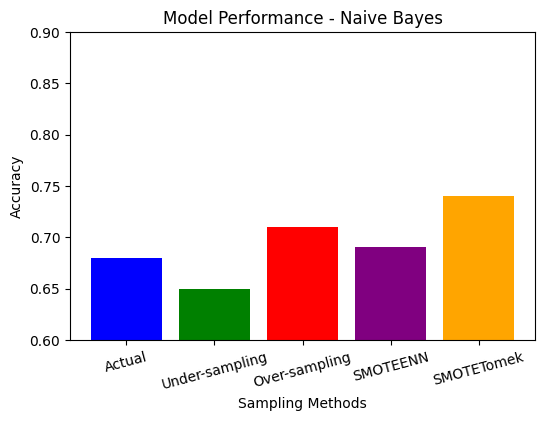

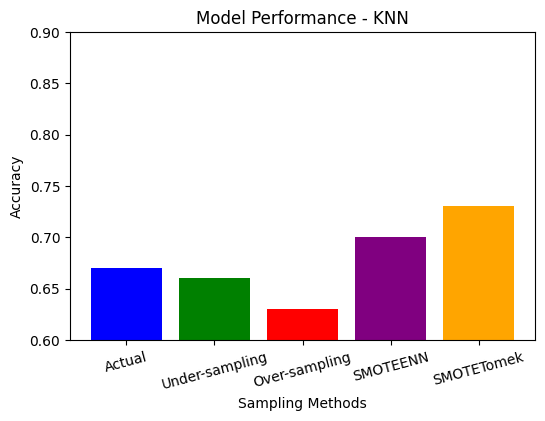

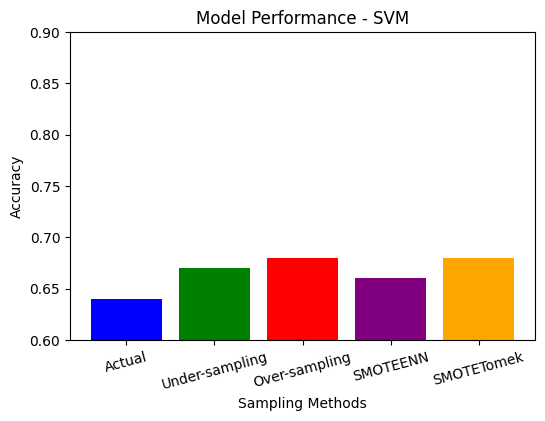

In [ ]:
models = ["Naive Bayes", "KNN", "SVM"]
sampling_methods = ["Actual", "Under-sampling", "Over-sampling", "SMOTEENN", "SMOTETomek"]

# Accuracy results for each model under different sampling methods
naive_bayes_results = [actual_results["Naive Bayes"], under_sampled_results["Naive Bayes"], 
                       over_sampled_results["Naive Bayes"], smoteenn_results["Naive Bayes"], 
                       smotetomek_results["Naive Bayes"]]

knn_results = [actual_results["KNN"], under_sampled_results["KNN"], 
               over_sampled_results["KNN"], smoteenn_results["KNN"], 
               smotetomek_results["KNN"]]

svm_results = [actual_results["SVM"], under_sampled_results["SVM"], 
               over_sampled_results["SVM"], smoteenn_results["SVM"], 
               smotetomek_results["SVM"]]

all_results = [naive_bayes_results, knn_results, svm_results]

for i, model in enumerate(models):
    plt.figure(figsize=(8, 5))
    plt.bar(sampling_methods, all_results[i], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Sampling Methods')
    plt.ylabel('Accuracy')
    plt.title(f'Model Performance - {model}')
    plt.ylim(0, 1) 
    plt.xticks(rotation=15)
    plt.show()